In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('loan_approval_dataset.csv')
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
df.shape

(4269, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.duplicated(keep=False).sum()

0

In [9]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

In [10]:
df.columns = df.columns.str.strip()
def whitespace_remover(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].map(str.strip)
        else:
            pass

whitespace_remover(df)
print(df)

      loan_id  no_of_dependents     education self_employed  income_annum  \
0           1                 2      Graduate            No       9600000   
1           2                 0  Not Graduate           Yes       4100000   
2           3                 3      Graduate            No       9100000   
3           4                 3      Graduate            No       8200000   
4           5                 5  Not Graduate           Yes       9800000   
...       ...               ...           ...           ...           ...   
4264     4265                 5      Graduate           Yes       1000000   
4265     4266                 0  Not Graduate           Yes       3300000   
4266     4267                 2  Not Graduate            No       6500000   
4267     4268                 1  Not Graduate            No       4100000   
4268     4269                 1      Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0   

In [11]:
loans = df['loan_status'].value_counts()

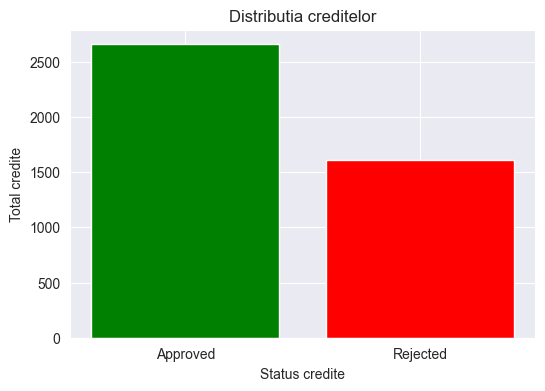

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(loans.index, loans.values, color=['green', 'red'])
plt.title('Distributia creditelor')
plt.xlabel('Status credite')
plt.ylabel('Total credite')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['education'] = label_encoder.fit_transform(df['education'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])

print(df[['education', 'self_employed','loan_status']])

      education  self_employed  loan_status
0             0              0            0
1             1              1            1
2             0              0            1
3             0              0            1
4             1              1            1
...         ...            ...          ...
4264          0              1            1
4265          1              1            0
4266          1              0            1
4267          1              0            0
4268          0              0            0

[4269 rows x 3 columns]


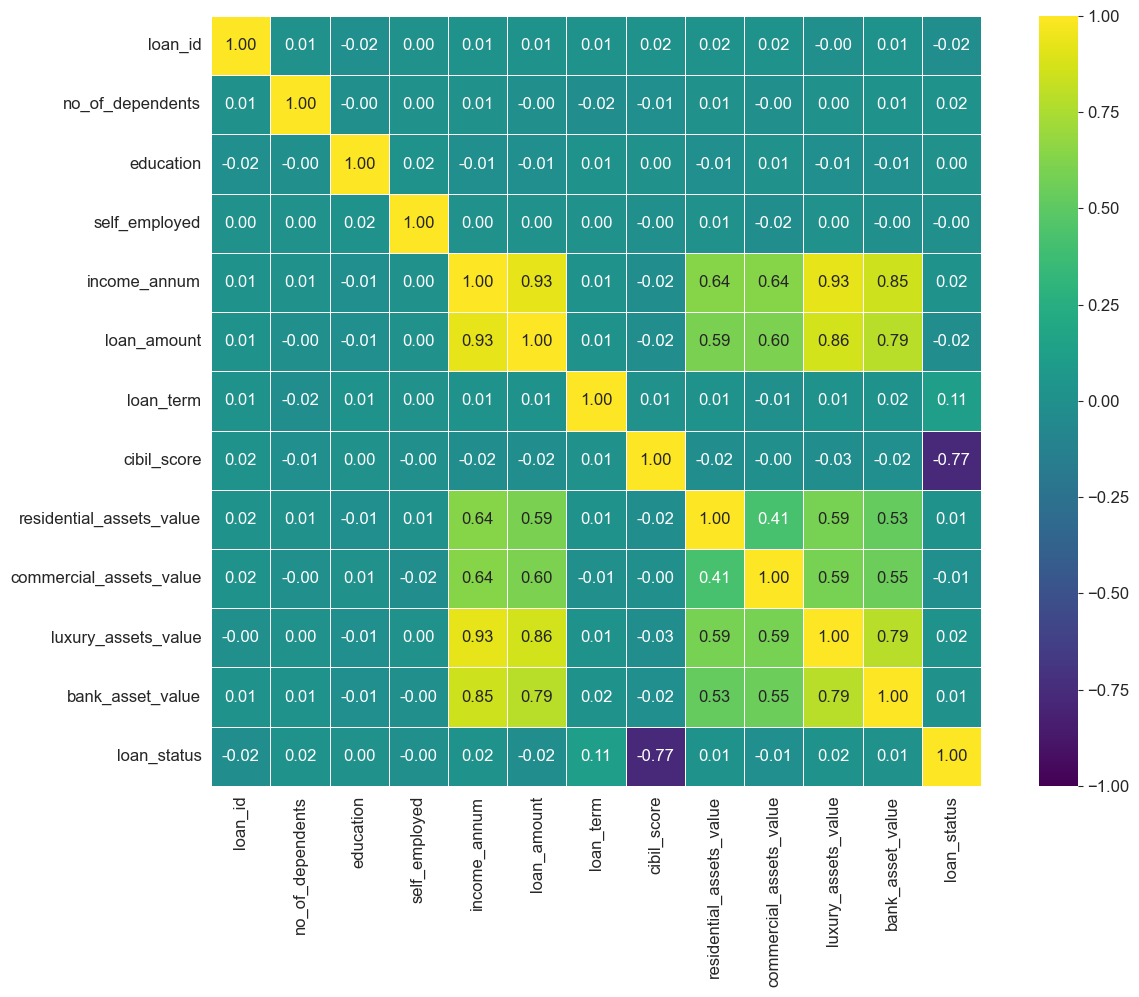

In [18]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 12})
sns.heatmap(df.corr(),cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [32]:
df.loc[(df['cibil_score'] > 500) & (df['loan_status'] == 1)].sort_values(['cibil_score'], ascending= False) 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
559,560,2,0,1,200000,500000,6,885,100000,0,300000,200000,1
3527,3528,0,0,0,1800000,6900000,10,853,900000,400000,3700000,1700000,1
911,912,0,0,1,1300000,4800000,4,835,500000,100000,3300000,800000,1
3213,3214,1,1,1,4300000,16300000,14,792,400000,400000,10200000,4000000,1
236,237,3,0,1,900000,3500000,4,770,700000,0,2000000,600000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,113,5,1,0,7100000,19700000,8,502,7300000,5600000,25300000,9800000,1
2265,2266,0,1,1,3700000,9700000,12,501,2600000,6600000,9200000,4600000,1
404,405,3,0,0,500000,1000000,20,501,800000,800000,900000,200000,1
2691,2692,1,1,1,5300000,18500000,6,501,6700000,8600000,16600000,4300000,1


<Figure size 800x600 with 0 Axes>

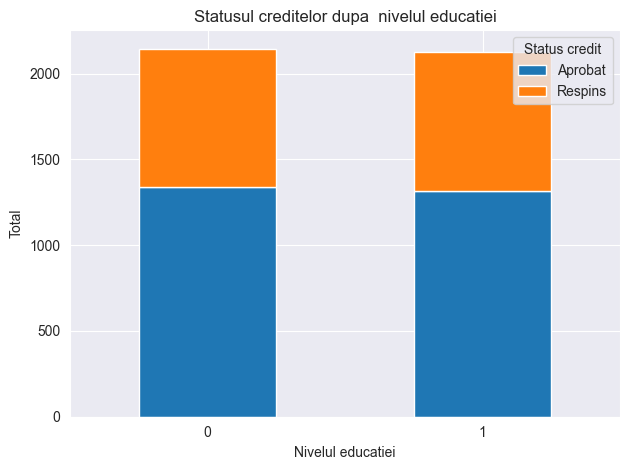

In [12]:
df.columns = df.columns.str.strip()
if 'education' in df.columns and 'loan_status' in df.columns: educatie= df.groupby(['education', 'loan_status']).size().unstack()
plt.figure(figsize=(8, 6))
educatie.plot(kind='bar', stacked=True)
plt.title('Statusul creditelor dupa  nivelul educatiei')
plt.xlabel('Nivelul educatiei')
plt.ylabel('Total')
plt.legend(title='Status credit', loc='upper right', labels=['Aprobat', 'Respins'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

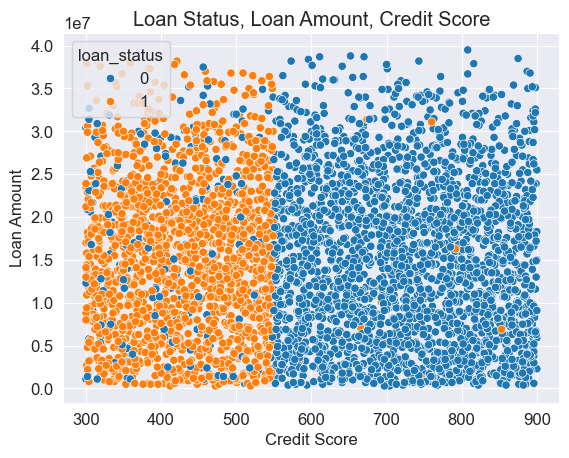

In [33]:
sns.scatterplot(x=df['cibil_score'], y= df['loan_amount'], hue=df['loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Loan Amount")
plt.show()

<Axes: xlabel='no_of_dependents', ylabel='count'>

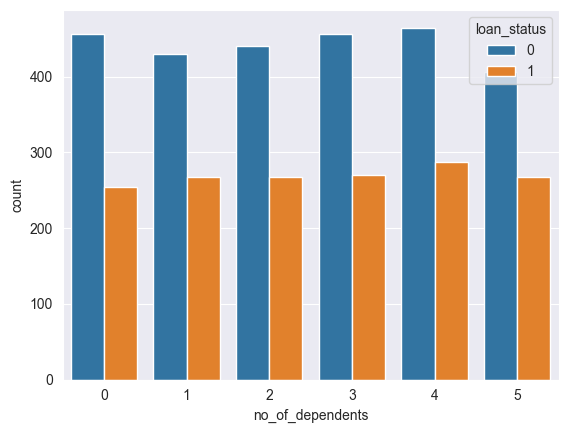

In [14]:
sns.countplot(x = 'no_of_dependents', data = df, hue = 'loan_status')

<Axes: xlabel='loan_term', ylabel='loan_amount'>

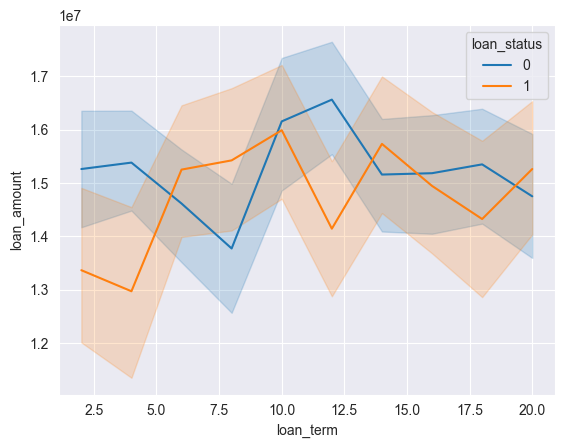

In [15]:
sns.lineplot(x='loan_term', y='loan_amount', data=df, hue='loan_status')

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.drop(columns=['loan_status'])
y = df['loan_status']

numerical_columns = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score','residential_assets_value', 'commercial_assets_value', 'luxury_assets_value','bank_asset_value']
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

print("Scaled Feature Variables (x):")
print(x.head())
print("\nTarget Variable (y):")
print(y.head())

Scaled Feature Variables (x):
   loan_id  no_of_dependents  education  self_employed  income_annum  \
0        1         -0.294102          0              0      1.617979   
1        2         -1.473548          1              1     -0.341750   
2        3          0.295621          0              0      1.439822   
3        4          0.295621          0              0      1.119139   
4        5          1.475067          1              1      1.689242   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     1.633052   0.192617     1.032792                 -0.780440   
1    -0.324414  -0.508091    -1.061051                 -0.734296   
2     1.610933   1.594031    -0.544840                 -0.057515   
3     1.721525  -0.508091    -0.771045                  1.649818   
4     1.002681   1.594031    -1.264055                  0.757698   

   commercial_assets_value  luxury_assets_value  bank_asset_value  
0                 2.877289             0.832028          0.9

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       264
           1       0.88      0.90      0.89       163

    accuracy                           0.92       427
   macro avg       0.91      0.91      0.91       427
weighted avg       0.92      0.92      0.92       427

Accuracy of Logistic Regression is :  91.56908665105387
Confusion Matrix:
[[245  19]
 [ 17 146]]


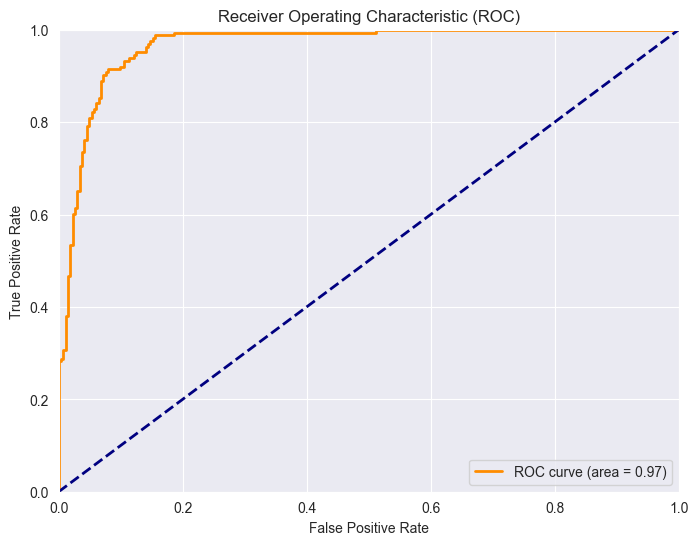

Acuratețea medie: 0.9154388286554411
Standard Deviation: 0.007212722048182442
Acuratețe pentru fiecare fold: [0.91100703 0.90398126 0.91686183 0.92154567 0.92379836]


In [88]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000)
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)
regprobs = reg.predict_proba(x_test)[:, 1] 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

print("Confusion Matrix:")
print(confusion_matrix(y_test, regpred))

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

fpr, tpr, thresholds = roc_curve(y_test, regprobs)
auc = roc_auc_score(y_test, regprobs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')

plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)
accuracy_scores = cross_val_score(pipeline, x, y, cv=kfold, scoring='accuracy')
print("Acuratețea medie:", np.mean(accuracy_scores))
print("Standard Deviation:", np.std(accuracy_scores))
print("Acuratețe pentru fiecare fold:", accuracy_scores)

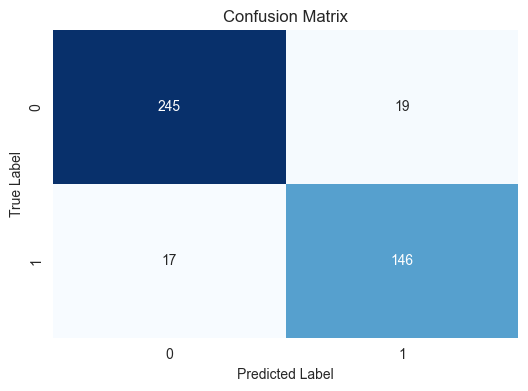

In [89]:
cm = confusion_matrix(y_test, regpred)

plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
import numpy as np 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.07962529274004684
Mean Squared Error :  0.07962529274004684
Root Mean Squared Error :  0.2821795399033155
R2 Score :  0.6484064709871162


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       264
           1       0.97      0.99      0.98       163

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Accuracy of Decision Tree is :  98.36065573770492


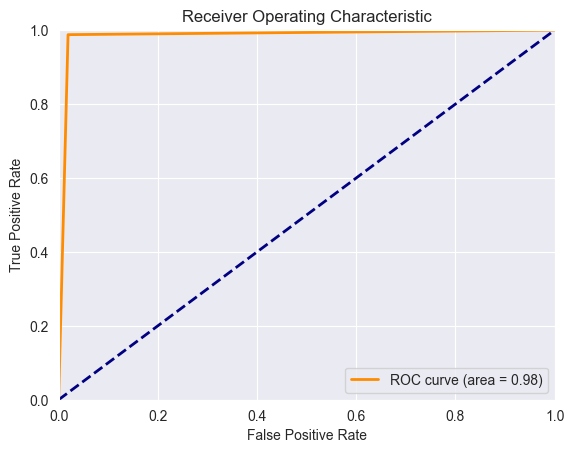

In [92]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)
dtree_probs = dtree.predict_proba(x_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, dtree_probs)
roc_auc = roc_auc_score(y_test, dtree_probs)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')

plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


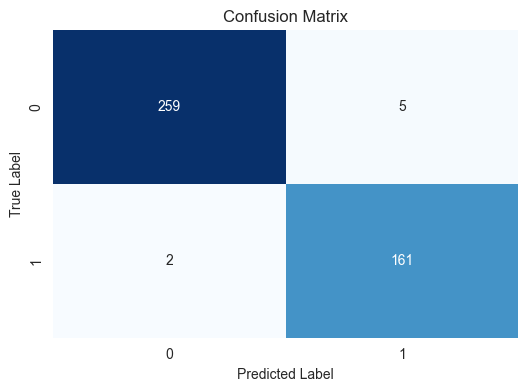

In [93]:
cm = confusion_matrix(y_test, dtreepred)

plt.figure(figsize=(6, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) 
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [94]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.01639344262295082
Mean Squared Error :  0.01639344262295082
Root Mean Squared Error :  0.12803687993289598
R2 Score :  0.9305400632087749


Mean ROC AUC from cross-validation: 1.00
AUC: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.98      0.96      0.97       163

    accuracy                           0.98       427
   macro avg       0.98      0.97      0.98       427
weighted avg       0.98      0.98      0.98       427

Accuracy of Random Forest is: 97.66%


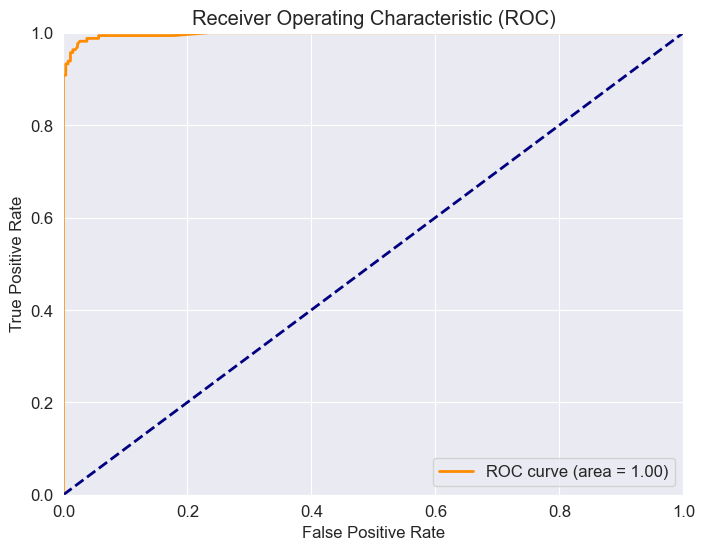

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)


y_probs = rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
test_auc = roc_auc_score(y_test, y_probs)

rfpred = rf.predict(x_test)



fpr, tpr, thresholds = roc_curve(y_test, y_probs)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = cross_val_score(rf, x, y, cv=kfold, scoring='roc_auc')

auc = roc_auc_score(y_test, y_probs)
print(f"Mean ROC AUC from cross-validation: {np.mean(auc_scores):.2f}")
print("AUC: {:.2f}".format(auc))

rfpred = rf.predict(x_test)
print("Classification Report:")
print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is: {:.2f}%".format(accuracy_score(y_test, rfpred) * 100))

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')

plt.ylim([0.0, 1.0])
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

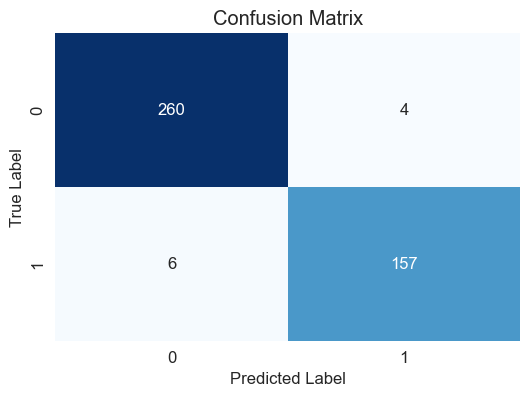

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rfpred)

plt.figure(figsize=(6, 4))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False) 
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np 

print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.0234192037470726
Mean Squared Error :  0.0234192037470726
Root Mean Squared Error :  0.15303334194571
R2 Score :  0.9007715188696783


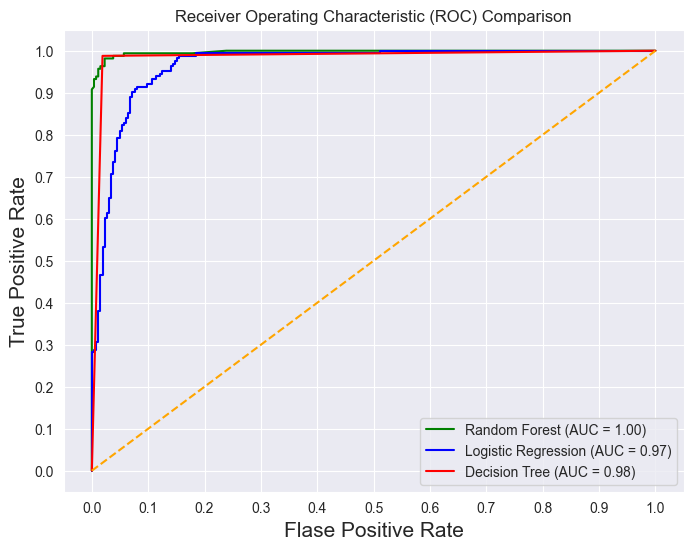

In [98]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)

rf.fit(x_train, y_train)
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)

probs_rf = rf.predict_proba(x_test)[:, 1]
probs_lr = lr.predict_proba(x_test)[:, 1]
probs_dt = dt.predict_proba(x_test)[:, 1] 

fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)
auc_rf = roc_auc_score(y_test, probs_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)
auc_dt = roc_auc_score(y_test, probs_dt)


plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='red')

plt.plot([0, 1], [0, 1], color='orange', linestyle='--') 

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('Receiver Operating Characteristic (ROC) Comparison')
plt.legend(loc="lower right")
plt.show()



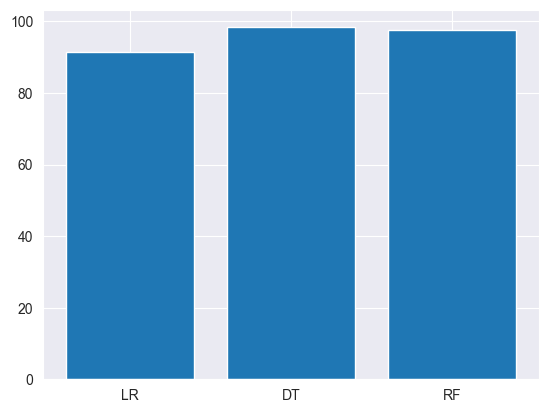

In [101]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [26]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                     feature  importance
7                cibil_score    0.811244
6                  loan_term    0.054940
5                loan_amount    0.026875
0                    loan_id    0.017019
4               income_annum    0.016475
10       luxury_assets_value    0.016043
9    commercial_assets_value    0.015761
8   residential_assets_value    0.015155
11          bank_asset_value    0.015034
1           no_of_dependents    0.007029
3              self_employed    0.002527
2                  education    0.001897
